# Read hw1.csv file and plot figure for visulization

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv('/content/gdrive/My Drive/AI_medical/Day1/hw1.csv')
df

,report_id,hospital_id,transfer_idx,disease,disease2,death_1m,age,sex,weight,height
0,R0001190,H0032093,2,False,-1,False,91,1,40,153
1,R0001575,H0082188,6,False,-1,False,64,1,67,181
2,R0002763,H0031789,2,False,-1,False,61,1,56,151
3,R0002510,H0092355,6,False,-1,False,52,0,47,176
4,R0001296,H0088464,3,True,0,False,65,0,64,157
...,...,...,...,...,...,...,...,...,...,...
3065,R0002152,H0019197,1,True,2,False,90,1,51,144
3066,R0002901,H0024731,1,True,2,True,71,1,50,155
3067,R0000675,H0091312,0,True,1,False,45,1,52,174
3068,R0000638,H0092408,1,False,0,False,50,1,40,157


#### Q1: Calculate how many unique **repory_id** and **hospital_id** ?

**HINT: np.unique**

In [3]:
df['report_id'].unique

<bound method Series.unique of 0       R0001190
1       R0001575
2       R0002763
3       R0002510
4       R0001296
          ...   
3065    R0002152
3066    R0002901
3067    R0000675
3068    R0000638
3069    R0000231
Name: report_id, Length: 3070, dtype: object>

In [4]:
df['hospital_id'].unique

<bound method Series.unique of 0       H0032093
1       H0082188
2       H0031789
3       H0092355
4       H0088464
          ...   
3065    H0019197
3066    H0024731
3067    H0091312
3068    H0092408
3069    H0088047
Name: hospital_id, Length: 3070, dtype: object>

#### Q2: Create a new column named **BMI**

**HINT**: https://zh.wikipedia.org/wiki/%E8%BA%AB%E9%AB%98%E9%AB%94%E9%87%8D%E6%8C%87%E6%95%B8


In [5]:
df['BMI'] = df['weight']/(df['height']*0.01)**2

In [6]:
df.head()

,report_id,hospital_id,transfer_idx,disease,disease2,death_1m,age,sex,weight,height,BMI
0,R0001190,H0032093,2,False,-1,False,91,1,40,153,17.087445
1,R0001575,H0082188,6,False,-1,False,64,1,67,181,20.451146
2,R0002763,H0031789,2,False,-1,False,61,1,56,151,24.560326
3,R0002510,H0092355,6,False,-1,False,52,0,47,176,15.173037
4,R0001296,H0088464,3,True,0,False,65,0,64,157,25.964542


#### Q3: Use Matplotlib to plot figures for the columns, figure type is up to you (bar, plot, histogram , scatter ... etc)

In [7]:
import matplotlib.pyplot as plt

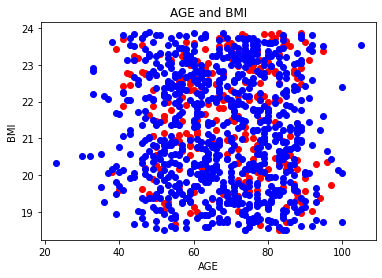

In [8]:
plt.scatter(df[(df['sex']==0)&(df['BMI']>18.5)&(df['BMI']<23.9)]['age'], (df[(df['sex']==0)&(df['BMI']>18.5)&(df['BMI']<23.9)]['BMI']), c='r')
plt.scatter(df[(df['sex']==1)&(df['BMI']>18.5)&(df['BMI']<23.9)]['age'], (df[(df['sex']==1)&(df['BMI']>18.5)&(df['BMI']<23.9)]['BMI']), c='b')
plt.title('AGE and BMI')
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.show()

In [9]:
bmi_labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obese']
cut_bins = [0, 18.5, 24.9, 29.9, df["BMI"].max()]
df['BMI_GROUP'] = pd.cut(df['BMI'], bins=cut_bins, include_lowest=False)
df['BMI_label'] = pd.cut(df['BMI'], bins=cut_bins, labels=bmi_labels, include_lowest=False)
df

,report_id,hospital_id,transfer_idx,disease,disease2,death_1m,age,sex,weight,height,BMI,BMI_GROUP,BMI_label
0,R0001190,H0032093,2,False,-1,False,91,1,40,153,17.087445,"(0.0, 18.5]",Underweight
1,R0001575,H0082188,6,False,-1,False,64,1,67,181,20.451146,"(18.5, 24.9]",Healthy weight
2,R0002763,H0031789,2,False,-1,False,61,1,56,151,24.560326,"(18.5, 24.9]",Healthy weight
3,R0002510,H0092355,6,False,-1,False,52,0,47,176,15.173037,"(0.0, 18.5]",Underweight
4,R0001296,H0088464,3,True,0,False,65,0,64,157,25.964542,"(24.9, 29.9]",Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,R0002152,H0019197,1,True,2,False,90,1,51,144,24.594907,"(18.5, 24.9]",Healthy weight
3066,R0002901,H0024731,1,True,2,True,71,1,50,155,20.811655,"(18.5, 24.9]",Healthy weight
3067,R0000675,H0091312,0,True,1,False,45,1,52,174,17.175320,"(0.0, 18.5]",Underweight
3068,R0000638,H0092408,1,False,0,False,50,1,40,157,16.227839,"(0.0, 18.5]",Underweight


In [10]:
BMI_data = df[['sex','age','BMI_GROUP']]
BMI_data

,sex,age,BMI_GROUP
0,1,91,"(0.0, 18.5]"
1,1,64,"(18.5, 24.9]"
2,1,61,"(18.5, 24.9]"
3,0,52,"(0.0, 18.5]"
4,0,65,"(24.9, 29.9]"
...,...,...,...
3065,1,90,"(18.5, 24.9]"
3066,1,71,"(18.5, 24.9]"
3067,1,45,"(0.0, 18.5]"
3068,1,50,"(0.0, 18.5]"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


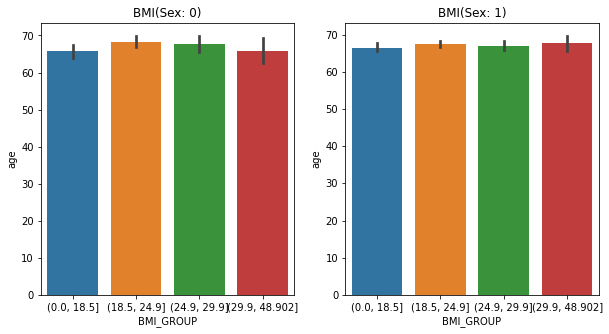

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('BMI(Sex: 0)')
px0 = BMI_data[BMI_data['sex']==0]["BMI_GROUP"]
py0 = BMI_data[BMI_data['sex']==0]["age"]
sns.barplot(px0, py0)

plt.subplot(1, 2, 2)
plt.title('BMI(Sex: 1)')
px1 = BMI_data[BMI_data['sex']==1]["BMI_GROUP"]
py1 = BMI_data[BMI_data['sex']==1]["age"]
sns.barplot(px1, py1)